# DETR (End-to-End Object Detection) model with ResNet-101 backbone

DEtection TRansformer (DETR) model trained end-to-end on COCO 2017 object detection (118k annotated images).

**Check:** [https://huggingface.co/facebook/detr-resnet-101](https://huggingface.co/facebook/detr-resnet-101)

In [1]:
!pip install -q timm

In [2]:
import torch

from matplotlib import pyplot as plt
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests

In [3]:
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-101")
print("Model loaded")

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101")
print("Processor loaded")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-101 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

Processor loaded


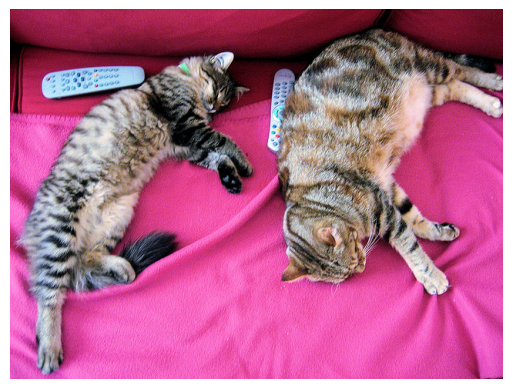

In [4]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

plt.imshow(image)
plt.axis('off')
plt.show()

In [10]:
def inference(image):
  inputs = processor(images=image, return_tensors="pt")
  outputs = model(**inputs)

  # let's only keep detections with score > 0.9
  target_sizes = torch.tensor([image.size[::-1]])
  results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

  # display
  COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
            [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

  fig, ax = plt.subplots(1, 1, figsize=(16,10))
  ax.imshow(image)

  for score, label, box, c in zip(results["scores"], results["labels"], results["boxes"], COLORS * 100):
      box = [round(i, 2) for i in box.tolist()]
      (xmin, ymin, xmax, ymax) = box
      print(
              f"Detected {model.config.id2label[label.item()]} with confidence "
              f"{round(score.item(), 3)} at location {box}"
      )
      text = f"{model.config.id2label[label.item()]} [{round(score.item(), 3)}]"
      ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=c, linewidth=3))
      ax.text(xmin, ymin, text, fontsize=15, bbox=dict(facecolor='yellow', alpha=0.5))
      ax.axis('off')
  plt.show()

inference(image)


Output hidden; open in https://colab.research.google.com to view.

In [6]:
from google.colab import files
uploaded = files.upload()


Saving image2.jpg to image2.jpg


Detected person with confidence 0.999 at location [959.71, 510.58, 1439.33, 1896.79]
Detected wine glass with confidence 0.976 at location [946.76, 932.5, 1022.85, 1062.22]


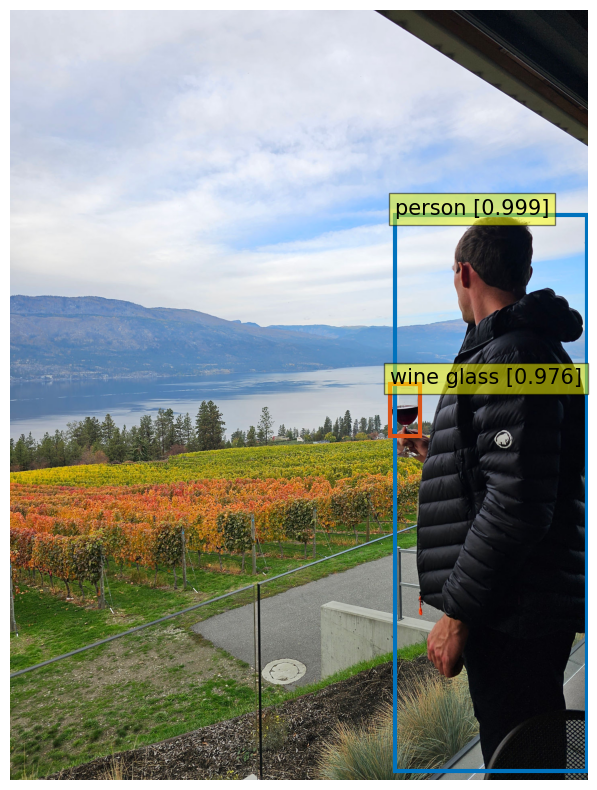

In [11]:
names = list(uploaded.keys())
path = names[0]

image = Image.open(path)
inference(image)